# Problem statement :
Predict future values for the Data Stock Index using Time Series Analysis

Pick up the following stocks and generate forecasts accordingly
Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

Before running the next lines Please download the dataset from below link
https://drive.google.com/open?id=1VxoJDgyiAdMRI7-Fp7RxazDTvQ9Lw54d 

##		IMPORT MODULES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels as sm
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: ignore


In [2]:
df = pd.read_csv('data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


#### Pick up the following stocks and generate forecasts accordingly

In [3]:
#list of specified stock
stock_features =['NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY']
#Date
col_list = ['DATE'] + stock_features
#copy into a new dataset
df1 = df[col_list]
#peek in
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,1491226200,143.6800,102.2300,81.03,33.7400,33.3975
1,1491226260,143.7000,102.1400,81.21,33.8800,33.3950
2,1491226320,143.6901,102.2125,81.21,33.9000,33.4100
3,1491226380,143.6400,102.1400,81.13,33.8499,33.3350
4,1491226440,143.6600,102.0600,81.12,33.8400,33.4000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Data columns (total 6 columns):
DATE           41266 non-null int64
NASDAQ.AAPL    41266 non-null float64
NASDAQ.ADP     41266 non-null float64
NASDAQ.CBOE    41266 non-null float64
NASDAQ.CSCO    41266 non-null float64
NASDAQ.EBAY    41266 non-null float64
dtypes: float64(5), int64(1)
memory usage: 1.9 MB


#### Checking for null values if any

In [5]:
df1.isnull().sum()

DATE           0
NASDAQ.AAPL    0
NASDAQ.ADP     0
NASDAQ.CBOE    0
NASDAQ.CSCO    0
NASDAQ.EBAY    0
dtype: int64

In [6]:
df1['DATE'] =pd.to_datetime(df1['DATE'],unit='s')
df1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


In [7]:
df1.tail()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
41261,2017-08-31 19:56:00,164.11,106.565,100.89,32.185,36.135
41262,2017-08-31 19:57:00,164.12,106.590,100.88,32.200,36.130
41263,2017-08-31 19:58:00,164.01,106.520,100.86,32.200,36.130
41264,2017-08-31 19:59:00,163.88,106.400,100.83,32.195,36.120
41265,2017-08-31 20:00:00,163.98,106.470,100.89,32.225,36.130


In [8]:
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


In [9]:
df1 = df1.copy()
df1['Month'] = df1['DATE'].dt.date

In [10]:
df1['Month'].value_counts()

2017-04-03    391
2017-07-10    391
2017-04-28    391
2017-06-07    391
2017-08-17    391
2017-05-11    391
2017-04-21    391
2017-06-19    391
2017-05-26    391
2017-07-31    391
2017-08-31    391
2017-06-21    391
2017-04-07    391
2017-08-11    391
2017-06-12    391
2017-06-27    391
2017-07-14    391
2017-05-30    391
2017-05-22    391
2017-08-04    391
2017-07-21    391
2017-05-19    391
2017-05-31    391
2017-05-15    391
2017-04-05    391
2017-05-17    391
2017-07-24    391
2017-07-13    391
2017-06-20    391
2017-08-23    391
             ... 
2017-05-24    391
2017-05-25    391
2017-04-25    391
2017-04-24    391
2017-06-01    391
2017-05-23    391
2017-08-10    391
2017-06-28    391
2017-05-08    391
2017-07-27    391
2017-08-03    391
2017-08-15    391
2017-06-26    391
2017-04-10    391
2017-04-19    391
2017-07-12    391
2017-05-05    391
2017-07-17    391
2017-05-01    391
2017-08-25    391
2017-04-18    391
2017-04-13    391
2017-06-15    391
2017-04-17    391
2017-06-29

In [11]:
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY,Month
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975,2017-04-03
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950,2017-04-03
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100,2017-04-03
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350,2017-04-03
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000,2017-04-03


In [12]:
col_list = ['Month']+ stock_features
df2 = df1[col_list]
df2.head()

,Month,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,2017-04-03,143.6800,102.2300,81.03,33.7400,33.3975
1,2017-04-03,143.7000,102.1400,81.21,33.8800,33.3950
2,2017-04-03,143.6901,102.2125,81.21,33.9000,33.4100
3,2017-04-03,143.6400,102.1400,81.13,33.8499,33.3350
4,2017-04-03,143.6600,102.0600,81.12,33.8400,33.4000


In [13]:
df2.isnull().sum()

Month          0
NASDAQ.AAPL    0
NASDAQ.ADP     0
NASDAQ.CBOE    0
NASDAQ.CSCO    0
NASDAQ.EBAY    0
dtype: int64

In [14]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NASDAQ.AAPL,41266.0,150.453566,6.236826,140.160,144.640,149.9450,155.065,164.51
NASDAQ.ADP,41266.0,103.480398,4.424244,95.870,101.300,102.4400,104.660,121.77
NASDAQ.CBOE,41266.0,89.325485,5.746178,80.000,84.140,89.3150,93.850,101.35
NASDAQ.CSCO,41266.0,32.139336,0.985571,30.365,31.455,31.7733,32.790,34.49
NASDAQ.EBAY,41266.0,34.794506,1.099296,31.890,34.065,34.7700,35.610,37.46


In [15]:
final = df2.copy()
final['Month']=pd.to_datetime(final['Month'])

In [16]:
#below function will be used to test whether the data is stationary or not
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

# 1. Time Series Forecasting for NASDAQ.AAPL

In [17]:
df_AAPL = final[['Month',stock_features[0]]]

In [18]:
df_AAPL.head()

,Month,NASDAQ.AAPL
0,2017-04-03,143.6800
1,2017-04-03,143.7000
2,2017-04-03,143.6901
3,2017-04-03,143.6400
4,2017-04-03,143.6600


In [19]:
df_AAPL.set_index('Month',inplace=True)
df_AAPL.head()

,NASDAQ.AAPL
Month,
2017-04-03,143.6800
2017-04-03,143.7000
2017-04-03,143.6901
2017-04-03,143.6400
2017-04-03,143.6600


### Visualize the Data

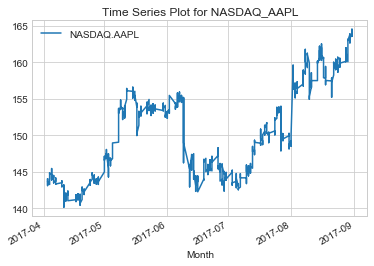

In [20]:
import seaborn as sns
sns.set_style('whitegrid')
df_AAPL.plot()
plt.title('Time Series Plot for NASDAQ_AAPL')
plt.show()

#### Plotting Rolling Statistics and check for stationarity :
    
The function will plot the moving mean or moving Standard Deviation. This is still visual method

NOTE: moving mean and moving standard deviation — At any instant ‘t’, we take the mean/std of the last year which in this case is 12 months)

In [21]:
adf_check(df_AAPL['NASDAQ.AAPL'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.9128532997926723
p-value : 0.7837101772613848
#Lags Used : 31
Number of Observations Used : 41234
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


###  MAKING THE TIME SERIES STATIONARY
There are two major factors that make a time series non-stationary. They are:

• Trend: non-constant mean

• Seasonality: Variation at specific time-frames

#### Differencing

The first difference of a time series is the series of changes from one period to the next. We can do this easily with pandas. You can continue to take the second difference, third difference, and so on until your data is stationary.

#### First Difference 

In [22]:
df_AAPL = df_AAPL.copy()
df_AAPL.loc[:,'First_Difference'] = df_AAPL['NASDAQ.AAPL'] - df_AAPL['NASDAQ.AAPL'].shift(1)

In [23]:
df_AAPL.head()

,NASDAQ.AAPL,First_Difference
Month,,
2017-04-03,143.6800,NaN
2017-04-03,143.7000,0.0200
2017-04-03,143.6901,-0.0099
2017-04-03,143.6400,-0.0501
2017-04-03,143.6600,0.0200


In [24]:
df_AAPL = df_AAPL.copy()
df_AAPL.dropna(inplace=True)

### Now again test staionarity

In [25]:
adf_check(df_AAPL['First_Difference'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -35.73774148340111
p-value : 0.0
#Lags Used : 30
Number of Observations Used : 41234
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


### Autocorrelation and Partial Autocorrelation Plots

#### Autocorrelation Interpretation
The actual interpretation and how it relates to ARIMA models can get a bit complicated, but there are some basic common methods we can use for the ARIMA model. Our main priority here is to try to figure out whether we will use the AR or MA components for the ARIMA model (or both!) as well as how many lags we should use. In general you would use either AR or MA, using both is less common.

* If the autocorrelation plot shows positive autocorrelation at the first lag (lag-1), then it suggests to use the AR terms in relation to the lag

* If the autocorrelation plot shows negative autocorrelation at the first lag, then it suggests using MA terms

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

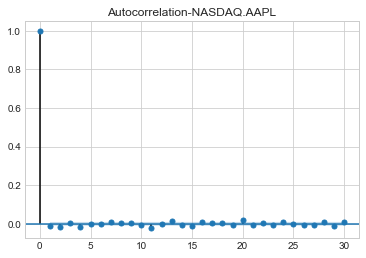

In [27]:
plt.figure(figsize=(20,8))
fig_first = plot_acf(df_AAPL["First_Difference"],lags=30,title='Autocorrelation-NASDAQ.AAPL')

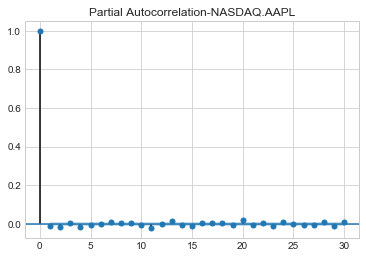

In [28]:
plt.figure(figsize=(20,8))
fig_pacf_first = plot_pacf(df_AAPL["First_Difference"],lags=30,title='Partial Autocorrelation-NASDAQ.AAPL')

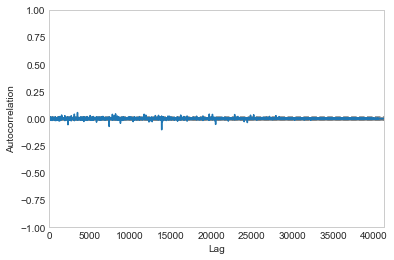

In [29]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_AAPL['First_Difference'])

### Using the Seasonal ARIMA model

In [31]:
import statsmodels.api as sm
model= sm.tsa.statespace.SARIMAX(df_AAPL['NASDAQ.AAPL'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


                                 Statespace Model Results                                 
Dep. Variable:                        NASDAQ.AAPL   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               24925.552
Date:                            Mon, 19 Nov 2018   AIC                         -49849.104
Time:                                    09:27:19   BIC                         -49840.476
Sample:                                         0   HQIC                        -49846.377
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0175   4.57e-06   3828.712      0.000       0.017       0.017
Ljung-Box (Q):                    1

In [32]:
df_AAPL = df_AAPL.copy()
df_AAPL['Forecast'] = results.predict()

In [33]:
df_AAPL.head()

,NASDAQ.AAPL,First_Difference,Forecast
Month,,,
2017-04-03,143.7000,0.0200,0.0000
2017-04-03,143.6901,-0.0099,143.7000
2017-04-03,143.6400,-0.0501,143.6901
2017-04-03,143.6600,0.0200,143.6400
2017-04-03,143.7800,0.1200,143.6600


### Prediction of Future Values

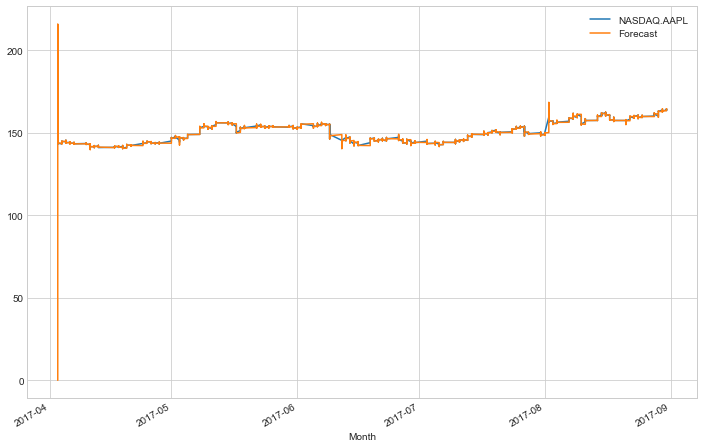

In [34]:
df_AAPL[['NASDAQ.AAPL','Forecast']].plot(figsize=(12,8))

In [35]:
results.forecast(steps=10)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    163.960
41266    163.935
41267    163.910
41268    163.810
41269    163.940
41270    163.950
41271    163.890
41272    163.860
41273    163.870
41274    163.760
dtype: float64

In [36]:
results.predict(start=41264,end=41274)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41264    163.930
41265    163.960
41266    163.935
41267    163.910
41268    163.810
41269    163.940
41270    163.950
41271    163.890
41272    163.860
41273    163.870
41274    163.760
dtype: float64

### Accuracy of the Forecast using MSE-Mean Squared Error

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.AAPL -', mean_squared_error(df_AAPL['NASDAQ.AAPL'],df_AAPL['Forecast']))
print('Mean Absolute Error NASDAQ.AAPL -', mean_absolute_error(df_AAPL['NASDAQ.AAPL'],df_AAPL['Forecast']))

Mean Squared Error NASDAQ.AAPL - 0.6426408211943265
Mean Absolute Error NASDAQ.AAPL - 0.07550728216058407


# 2. Time Series Forecasting for NASDAQ.ADP

In [38]:
df_ADP = final[['Month',stock_features[1]]]

In [39]:
df_ADP.head()

,Month,NASDAQ.ADP
0,2017-04-03,102.2300
1,2017-04-03,102.1400
2,2017-04-03,102.2125
3,2017-04-03,102.1400
4,2017-04-03,102.0600


In [40]:
df_ADP.set_index('Month',inplace=True)
df_ADP.head()

,NASDAQ.ADP
Month,
2017-04-03,102.2300
2017-04-03,102.1400
2017-04-03,102.2125
2017-04-03,102.1400
2017-04-03,102.0600


### Visualize Data 

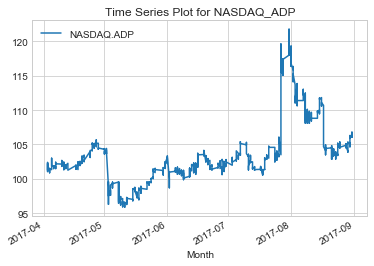

In [41]:
df_ADP.plot()
plt.title('Time Series Plot for NASDAQ_ADP')
plt.show()

In [42]:
adf_check(df_ADP['NASDAQ.ADP'])


Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.7041735251574457
p-value : 0.4289634442067018
#Lags Used : 39
Number of Observations Used : 41226
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### MAKING THE TIME SERIES STATIONARY

#### Differencing

In [43]:
df_ADP = df_ADP.copy()
df_ADP['First_Difference'] = df_ADP['NASDAQ.ADP'] - df_ADP['NASDAQ.ADP'].shift(1)

In [44]:
df_ADP.head()

,NASDAQ.ADP,First_Difference
Month,,
2017-04-03,102.2300,NaN
2017-04-03,102.1400,-0.0900
2017-04-03,102.2125,0.0725
2017-04-03,102.1400,-0.0725
2017-04-03,102.0600,-0.0800


In [45]:
df_ADP.dropna(inplace=True)

In [46]:
adf_check(df_ADP['First_Difference'])
#Now subtract the rolling mean from the original series

Augmented Dickey-Fuller Test:
ADF Test Statistic : -31.055662244632295
p-value : 0.0
#Lags Used : 38
Number of Observations Used : 41226
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


#### Autocorrelation and Partial Corelation plot

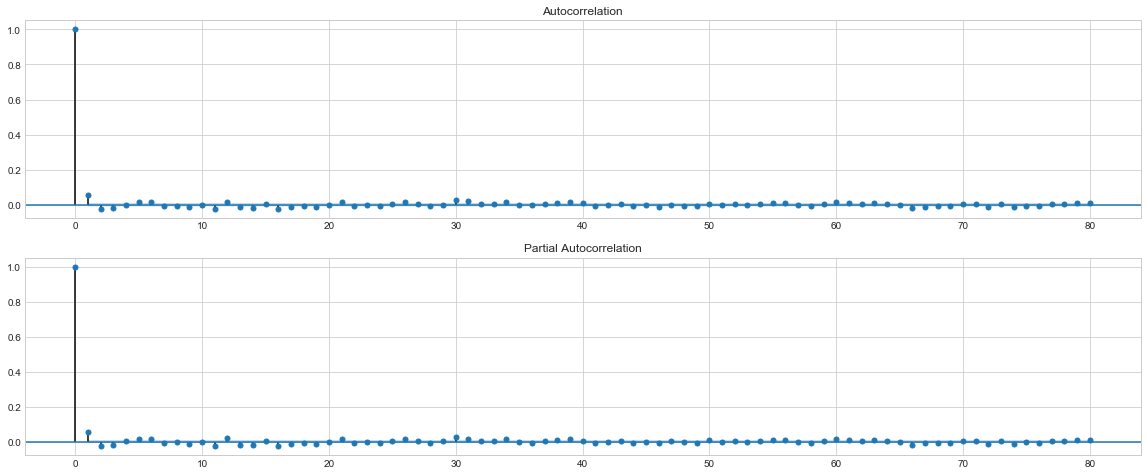

In [47]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_ADP['First_Difference'].iloc[38:], lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_ADP['First_Difference'].iloc[38:], lags=80, ax=ax2)

 ### Using Seasonal ARIMA model

In [48]:
model= sm.tsa.statespace.SARIMAX(df_ADP['NASDAQ.ADP'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


                                 Statespace Model Results                                 
Dep. Variable:                         NASDAQ.ADP   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               34733.013
Date:                            Mon, 19 Nov 2018   AIC                         -69464.026
Time:                                    09:32:26   BIC                         -69455.398
Sample:                                         0   HQIC                        -69461.299
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0109   5.34e-06   2036.744      0.000       0.011       0.011
Ljung-Box (Q):                    1

In [49]:
df_ADP['Forecast'] = results.predict()

In [50]:
df_ADP[['NASDAQ.ADP','Forecast']].tail()

,NASDAQ.ADP,Forecast
Month,,
2017-08-31,106.565,106.705
2017-08-31,106.590,106.525
2017-08-31,106.520,106.510
2017-08-31,106.400,106.480
2017-08-31,106.470,106.430


In [51]:
results.forecast(steps=10)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    106.470
41266    106.470
41267    106.440
41268    106.380
41269    106.440
41270    106.420
41271    106.450
41272    106.385
41273    106.410
41274    106.340
dtype: float64

In [52]:
results.predict(start=41264,end=41275)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41264    106.430
41265    106.470
41266    106.470
41267    106.440
41268    106.380
41269    106.440
41270    106.420
41271    106.450
41272    106.385
41273    106.410
41274    106.340
41275    106.220
dtype: float64

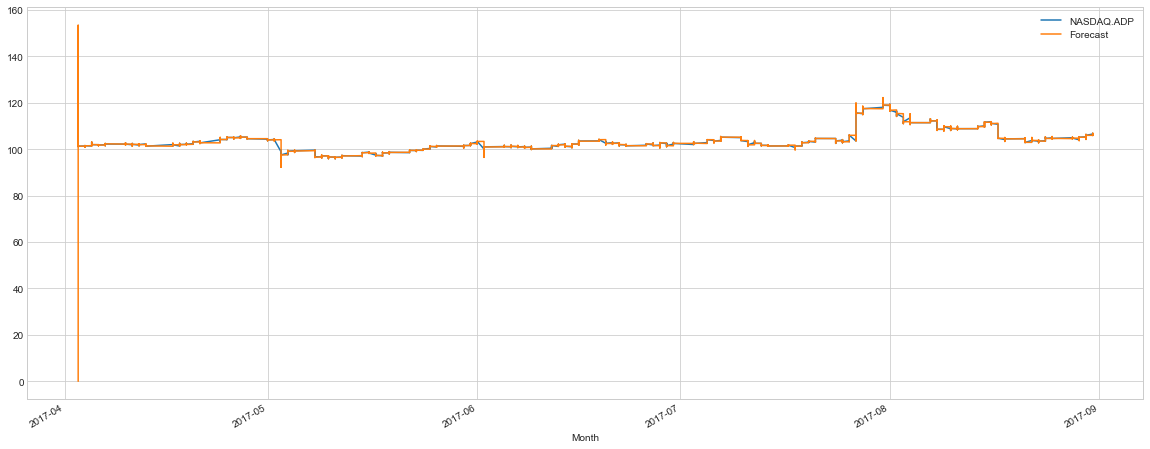

In [53]:
df_ADP[['NASDAQ.ADP','Forecast']].plot(figsize=(20,8))

In [54]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.AAPL -', mean_squared_error(df_ADP['NASDAQ.ADP'],df_ADP['Forecast']))
print('Mean Absolute Error NASDAQ.AAPL -', mean_absolute_error(df_ADP['NASDAQ.ADP'],df_ADP['Forecast']))

Mean Squared Error NASDAQ.AAPL - 0.3267938113021141
Mean Absolute Error NASDAQ.AAPL - 0.05339673817838606


# 3. Times Series Forecasting for 'NASDAQ.CBOE'

       Month  NASDAQ.CBOE
0 2017-04-03        81.03
1 2017-04-03        81.21
2 2017-04-03        81.21
3 2017-04-03        81.13
4 2017-04-03        81.12
            NASDAQ.CBOE
Month                  
2017-04-03        81.03
2017-04-03        81.21
2017-04-03        81.21
2017-04-03        81.13
2017-04-03        81.12


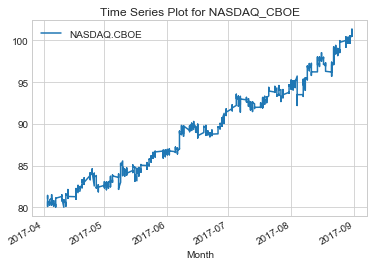

Augmented Dickey-Fuller Test:
ADF Test Statistic : 0.1663393028261534
p-value : 0.9703092030510077
#Lags Used : 27
Number of Observations Used : 41238
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [56]:
df_CBOE= final[['Month',stock_features[2]]]
print(df_CBOE.head())
df_CBOE.set_index('Month',inplace=True)
print(df_CBOE.head())

df_CBOE.plot()
plt.title('Time Series Plot for NASDAQ_CBOE')
plt.show()
#test Stationarity
adf_check(df_CBOE['NASDAQ.CBOE'])


### MAKING THE TIME SERIES STATIONARY

#### Differencing

In [57]:
df_CBOE = df_CBOE.copy()

In [58]:
df_CBOE.head()

,NASDAQ.CBOE
Month,
2017-04-03,81.03
2017-04-03,81.21
2017-04-03,81.21
2017-04-03,81.13
2017-04-03,81.12


In [59]:
df_CBOE['First_Difference'] = df_CBOE['NASDAQ.CBOE'] - df_CBOE['NASDAQ.CBOE'].shift(1)
df_CBOE.head()

,NASDAQ.CBOE,First_Difference
Month,,
2017-04-03,81.03,NaN
2017-04-03,81.21,0.18
2017-04-03,81.21,0.00
2017-04-03,81.13,-0.08
2017-04-03,81.12,-0.01


In [60]:
df_CBOE.dropna(inplace=True)

#### Test Seasonality

In [62]:
adf_check(df_CBOE['First_Difference'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -41.642093645431416
p-value : 0.0
#Lags Used : 26
Number of Observations Used : 41238
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


#### Autocorrelation and Partial Corelation plot

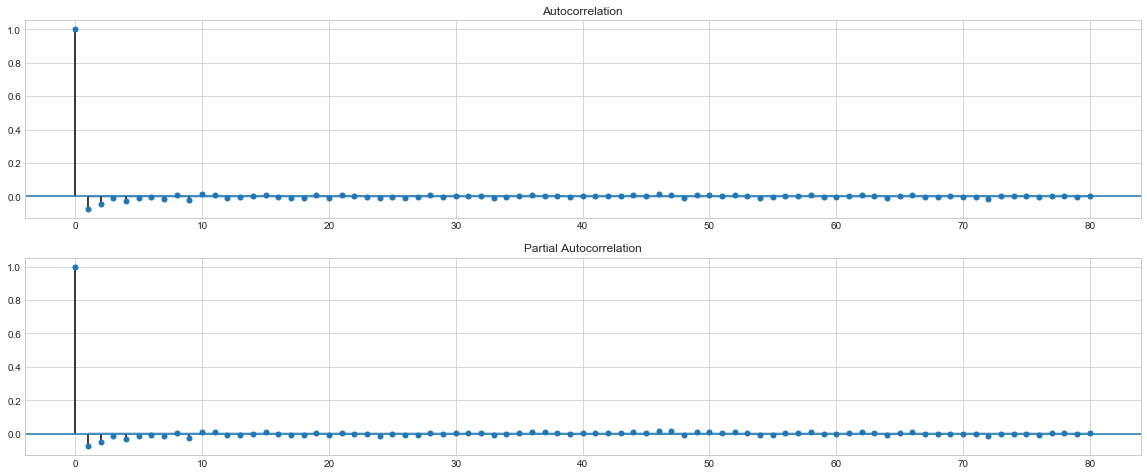

In [63]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_CBOE['First_Difference'].iloc[26:], lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_CBOE['First_Difference'].iloc[26:], lags=80, ax=ax2)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


                                 Statespace Model Results                                 
Dep. Variable:                        NASDAQ.CBOE   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               53414.092
Date:                            Mon, 19 Nov 2018   AIC                        -106826.184
Time:                                    09:36:30   BIC                        -106817.556
Sample:                                         0   HQIC                       -106823.457
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0044   5.33e-06    824.255      0.000       0.004       0.004
Ljung-Box (Q):                    1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    100.84
dtype: float64


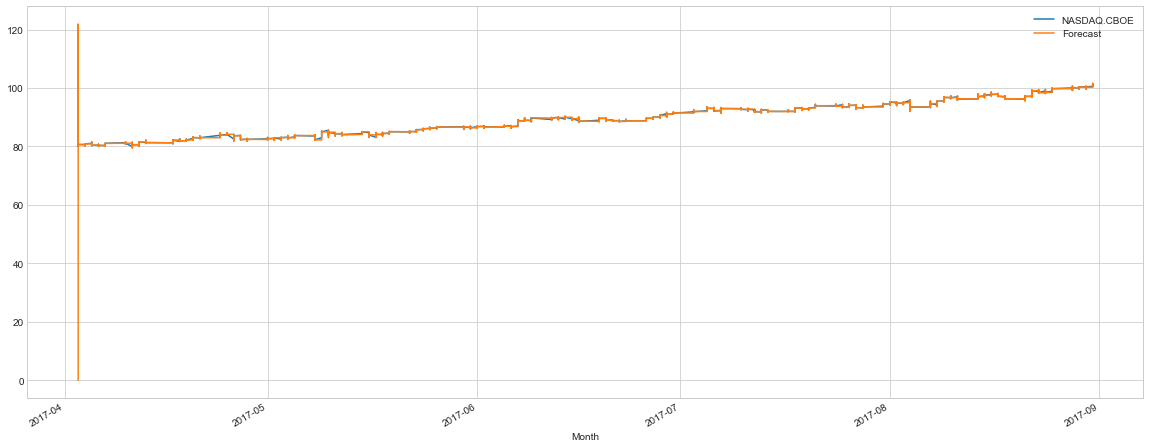

In [64]:
# fit model
model= sm.tsa.statespace.SARIMAX(df_CBOE['NASDAQ.CBOE'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())
print(results.forecast())
df_CBOE['Forecast'] = results.predict()
df_CBOE[['NASDAQ.CBOE','Forecast']].plot(figsize=(20,8))
plt.show()

In [65]:
results.forecast(steps=10)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    100.8400
41266    100.8900
41267    100.9100
41268    100.8700
41269    100.8800
41270    100.8700
41271    100.8799
41272    100.8800
41273    100.8700
41274    100.8500
dtype: float64

In [66]:
results.predict(start=41264,end=41273)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41264    100.8200
41265    100.8400
41266    100.8900
41267    100.9100
41268    100.8700
41269    100.8800
41270    100.8700
41271    100.8799
41272    100.8800
41273    100.8700
dtype: float64

In [67]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.CBOE -', mean_squared_error(df_CBOE['NASDAQ.CBOE'],df_CBOE['Forecast']))
print('Mean Absolute Error NASDAQ.CBOE -', mean_absolute_error(df_CBOE['NASDAQ.CBOE'],df_CBOE['Forecast']))

Mean Squared Error NASDAQ.CBOE - 0.203994001999313
Mean Absolute Error NASDAQ.CBOE - 0.04356630571673285


# 4. Time Series ForeCasting for 'NASDAQ.CSCO'

       Month  NASDAQ.CSCO
0 2017-04-03      33.7400
1 2017-04-03      33.8800
2 2017-04-03      33.9000
3 2017-04-03      33.8499
4 2017-04-03      33.8400
            NASDAQ.CSCO
Month                  
2017-04-03      33.7400
2017-04-03      33.8800
2017-04-03      33.9000
2017-04-03      33.8499
2017-04-03      33.8400


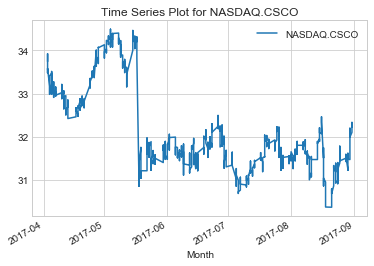

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.3955546108894588
p-value : 0.14299501995164549
#Lags Used : 47
Number of Observations Used : 41218
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [68]:
df_CSCO = final[['Month',stock_features[3]]]
print(df_CSCO.head())
df_CSCO.set_index('Month',inplace=True)
print(df_CSCO.head())
df_CSCO.plot()
plt.title("Time Series Plot for NASDAQ.CSCO")
plt.show()
#Test Staionarity
adf_check(df_CSCO['NASDAQ.CSCO'])



### MAKING TIME SERIES STATIONARY

#### Differencing

In [69]:
df_CSCO = df_CSCO.copy()
df_CSCO['First_Difference'] = df_CSCO['NASDAQ.CSCO'] - df_CSCO['NASDAQ.CSCO'].shift(1)
df_CSCO.dropna(inplace=True)
adf_check(df_CSCO['First_Difference'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -30.356682532566747
p-value : 0.0
#Lags Used : 46
Number of Observations Used : 41218
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


### Auto Corealtion and Partial Autocorelation Plots

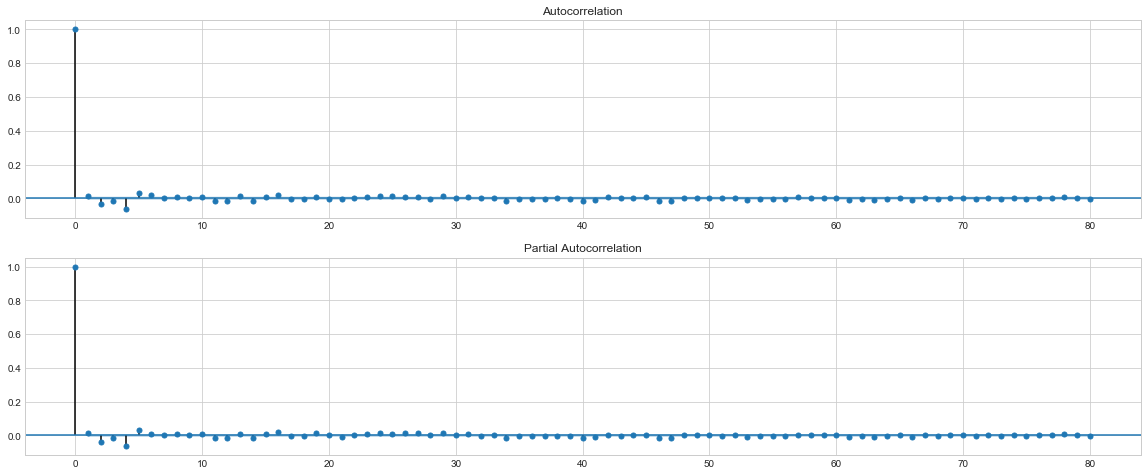

In [70]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_CSCO['First_Difference'].iloc[46:], lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_CSCO['First_Difference'].iloc[46:], lags=80, ax=ax2)

### Using ARIMA model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


                                 Statespace Model Results                                 
Dep. Variable:                        NASDAQ.CSCO   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               85502.595
Date:                            Mon, 19 Nov 2018   AIC                        -171003.190
Time:                                    09:39:31   BIC                        -170994.563
Sample:                                         0   HQIC                       -171000.463
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0009   1.54e-07   6012.819      0.000       0.001       0.001
Ljung-Box (Q):                    1

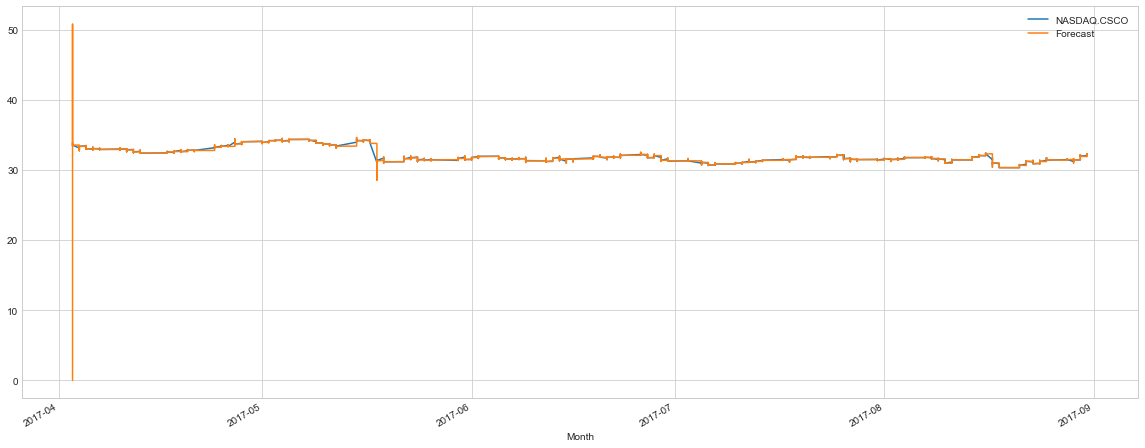

In [71]:
# fit model
model= sm.tsa.statespace.SARIMAX(df_CSCO['NASDAQ.CSCO'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())
df_CSCO['Forecast'] = results.predict()
df_CSCO[['NASDAQ.CSCO','Forecast']].plot(figsize=(20,8))
plt.show()

In [72]:
df_CSCO.head()

,NASDAQ.CSCO,First_Difference,Forecast
Month,,,
2017-04-03,33.8800,0.1400,0.0000
2017-04-03,33.9000,0.0200,33.8800
2017-04-03,33.8499,-0.0501,33.9000
2017-04-03,33.8400,-0.0099,33.8499
2017-04-03,33.8800,0.0400,33.8400


In [73]:
results.forecast(steps=10)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    32.225
41266    32.190
41267    32.170
41268    32.150
41269    32.180
41270    32.170
41271    32.150
41272    32.165
41273    32.180
41274    32.180
dtype: float64

In [74]:
results.predict(start=41264,end=41275)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41264    32.195
41265    32.225
41266    32.190
41267    32.170
41268    32.150
41269    32.180
41270    32.170
41271    32.150
41272    32.165
41273    32.180
41274    32.180
41275    32.175
dtype: float64

In [75]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.CSCO -', mean_squared_error(df_CSCO['NASDAQ.CSCO'],df_CSCO['Forecast']))
print('Mean Absolute Error NASDAQ.CSCO -', mean_absolute_error(df_CSCO['NASDAQ.CSCO'],df_CSCO['Forecast']))

Mean Squared Error NASDAQ.CSCO - 0.035693784496960784
Mean Absolute Error NASDAQ.CSCO - 0.01577540773092903


# 5. Time Series Forecasting for NASDAQ.EBAY

       Month  NASDAQ.EBAY
0 2017-04-03      33.3975
1 2017-04-03      33.3950
2 2017-04-03      33.4100
3 2017-04-03      33.3350
4 2017-04-03      33.4000
            NASDAQ.EBAY
Month                  
2017-04-03      33.3975
2017-04-03      33.3950
2017-04-03      33.4100
2017-04-03      33.3350
2017-04-03      33.4000


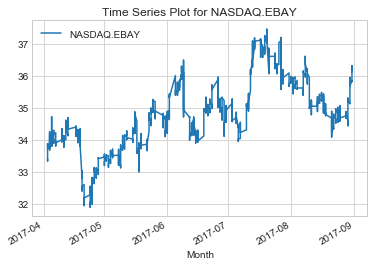

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.875761635941462
p-value : 0.343548087802453
#Lags Used : 47
Number of Observations Used : 41218
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [76]:
df_EBAY = final[['Month',stock_features[4]]]
print(df_EBAY.head())
df_EBAY.set_index('Month',inplace=True)
print(df_EBAY.head())
df_EBAY.plot()
plt.title("Time Series Plot for NASDAQ.EBAY")
plt.show()
#Test Staionarity
adf_check(df_EBAY['NASDAQ.EBAY'])

### MAKING TIME SERIES STATIONARY

#### Differencing

In [79]:
df_EBAY = df_EBAY.copy()
df_EBAY['First_Difference'] = df_EBAY['NASDAQ.EBAY'] - df_EBAY['NASDAQ.EBAY'].shift(1)
df_EBAY.dropna(inplace=True)
#test Stationarity
adf_check(df_EBAY['NASDAQ.EBAY'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.873910642715122
p-value : 0.3444321212346789
#Lags Used : 47
Number of Observations Used : 41216
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Autocorealtion plot and Partial Autocorelation plots

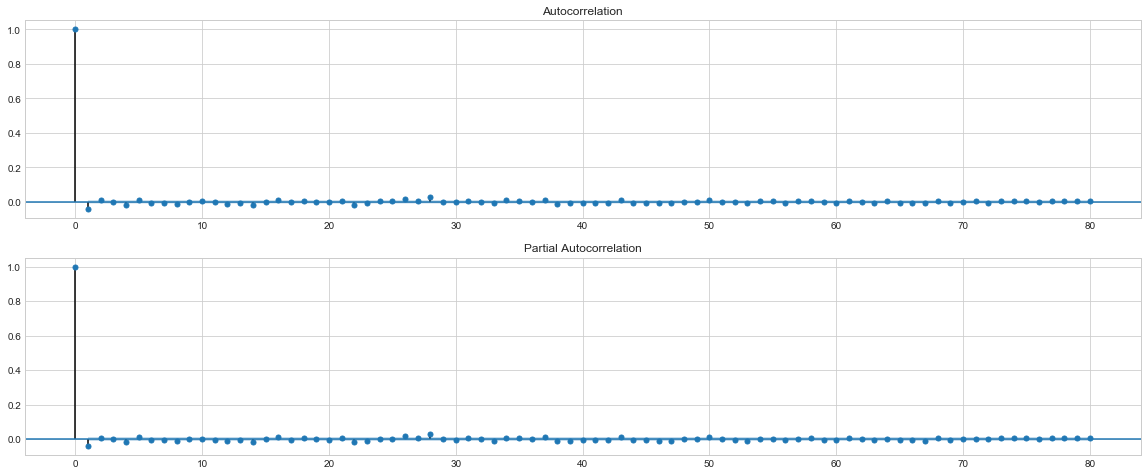

In [80]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_EBAY['First_Difference'].iloc[47:], lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_EBAY['First_Difference'].iloc[47:], lags=80, ax=ax2)

#### Note
The two dotted lines on either sides of 0 are the confidence intervals. 

These can be used to determine the ‘p’ and ‘q’ values as:
    
• p: The first time where the PACF crosses the upper confidence interval, here its close to 0. hence p = 0.
    
• q: The first time where the ACF crosses the upper confidence interval, here its close to 0. hence p = 0.

In [81]:
Applying ARIMA model

SyntaxError: invalid syntax (<ipython-input-81-1421355284f1>, line 1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


                                 Statespace Model Results                                 
Dep. Variable:                        NASDAQ.EBAY   No. Observations:                41264
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               82102.509
Date:                            Mon, 19 Nov 2018   AIC                        -164203.017
Time:                                    09:42:00   BIC                        -164194.390
Sample:                                         0   HQIC                       -164200.290
                                          - 41264                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0011   9.43e-07   1158.753      0.000       0.001       0.001
Ljung-Box (Q):                    1

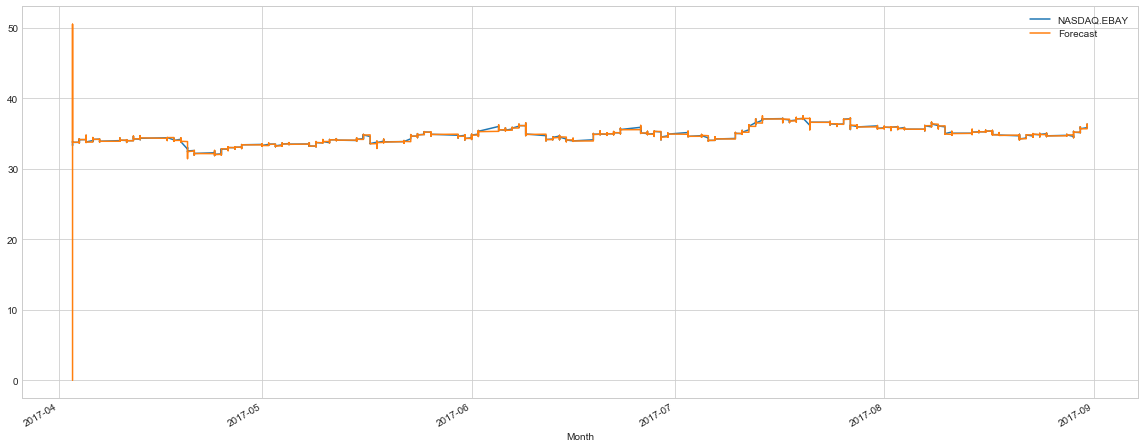

In [82]:
# fit model
model= sm.tsa.statespace.SARIMAX(df_EBAY['NASDAQ.EBAY'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())
df_EBAY['Forecast'] = results.predict()
df_EBAY[['NASDAQ.EBAY','Forecast']].plot(figsize=(20,8))
plt.show()

In [83]:
df_EBAY.head()

,NASDAQ.EBAY,First_Difference,Forecast
Month,,,
2017-04-03,33.410,0.015,0.000
2017-04-03,33.335,-0.075,33.410
2017-04-03,33.400,0.065,33.335
2017-04-03,33.430,0.030,33.400
2017-04-03,33.465,0.035,33.430


In [84]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.EBAY -', mean_squared_error(df_EBAY['NASDAQ.EBAY'],df_EBAY['Forecast']))
print('Mean Absolute Error NASDAQ.EBAY -', mean_absolute_error(df_EBAY['NASDAQ.EBAY'],df_EBAY['Forecast']))

Mean Squared Error NASDAQ.EBAY - 0.03491542225842739
Mean Absolute Error NASDAQ.EBAY - 0.021690800588591828


In [85]:
results.forecast(steps=10)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41264    36.090
41265    36.030
41266    36.030
41267    36.020
41268    36.020
41269    36.025
41270    36.020
41271    36.025
41272    36.020
41273    36.020
dtype: float64

In [86]:
 results.predict(start=41265,end=41275)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    36.030
41266    36.030
41267    36.020
41268    36.020
41269    36.025
41270    36.020
41271    36.025
41272    36.020
41273    36.020
41274    36.010
41275    36.020
dtype: float64